In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Harvest Metrics')

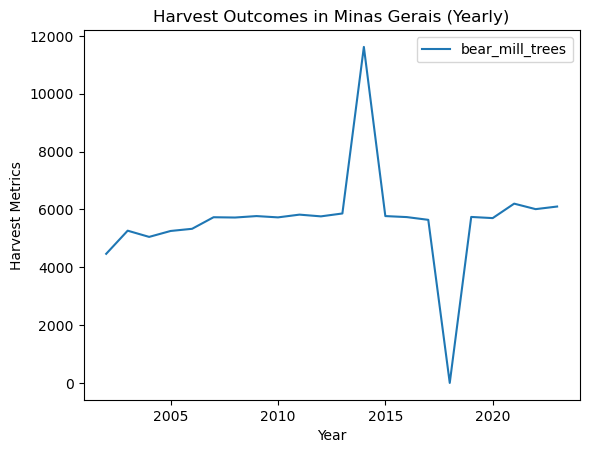

In [167]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/br_final.csv")
#filters data for just Minas Gerais
minasg = br[br["subdivision"] == "Minas Gerais"]

#groups data by year and calculate the sum of bear_mill_trees for each year
minasgyearly = minasg.groupby("year")[["bear_mill_trees"]].sum()

#plot the line graph
sns.lineplot(data=minasgyearly, x="year", y="bear_mill_trees", label="bear_mill_trees")


plt.title("Harvest Outcomes in Minas Gerais (Yearly)")
plt.xlabel("Year")
plt.ylabel("Harvest Metrics")


Text(0, 0.5, 'Harvest Metrics (millions)')

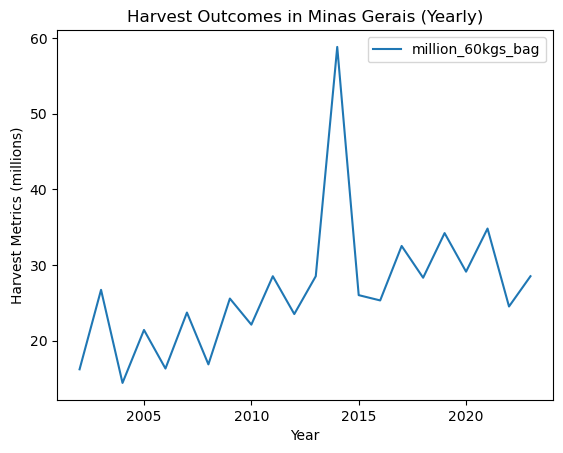

In [168]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/br_final.csv")

minasg = br[br["subdivision"] == "Minas Gerais"]

#groups data by year and calculate the sum of million_60kgs_bag for each year
minasgyearly = minasg.groupby("year")[["million_60kgs_bag"]].sum()


sns.lineplot(data=minasgyearly, x="year", y="million_60kgs_bag", label="million_60kgs_bag")


plt.title("Harvest Outcomes in Minas Gerais (Yearly)")
plt.xlabel("Year")
plt.ylabel("Harvest Metrics (millions)")

How have harvest outcomes changed for Minas Gerais throughout the years? 

there is a gradual increase of bearing trees over the 2000s. could reflect a period of steady agricultural development. overall total production(million_60kgs_bag) is more varied, could reflect market conditions.

both million_60kgs_bag and bear_mill_trees show a sharp peak around 2014, around 58 million bags and 11,900 trees. could mean favorable weather conditions. Its followed by an equally sharp decline around 2018, maybe caused by unfavorable weather, pests, etc. however total production dosnt have a decline, but in general more of an upward trend; may be reflecting improved agricultural.

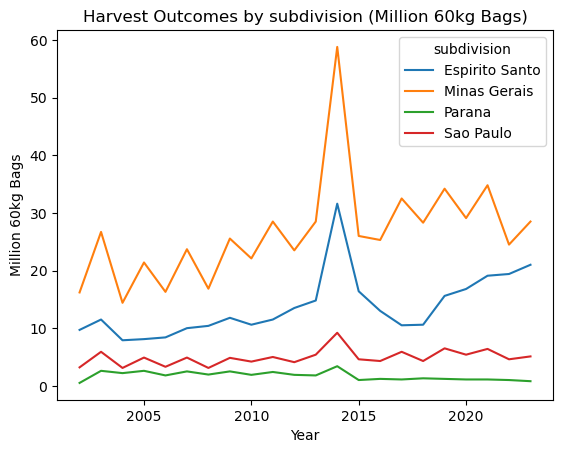

In [169]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/br_final.csv")

#groups the data by subdivision and year, and calculates the sum of 'million_60kgs_bag' for both
subtrend = br.groupby(["subdivision", "year"])[["million_60kgs_bag"]].sum()

# Create a line plot and different lines for each subdivision
sns.lineplot(data=subtrend, x="year", y="million_60kgs_bag", hue="subdivision")


plt.title("Harvest Outcomes by subdivision (Million 60kg Bags)")
plt.xlabel("Year")
plt.ylabel("Million 60kg Bags")
plt.legend(title="subdivision")


Are these harvest outcomes similar to other regions in Brazil?  

Minas Gerias outperforms other regions, but follows similar patterns as other regions, just at a larger scale. specifically sao paulo displays the varied peaks. And all regions experience the peak around 2014 (espirito santo does experience the decline around 2018). this probably reflects generally shared weather and market. difference in scale could be due to diffrences in weather, agricultural practices, etc.

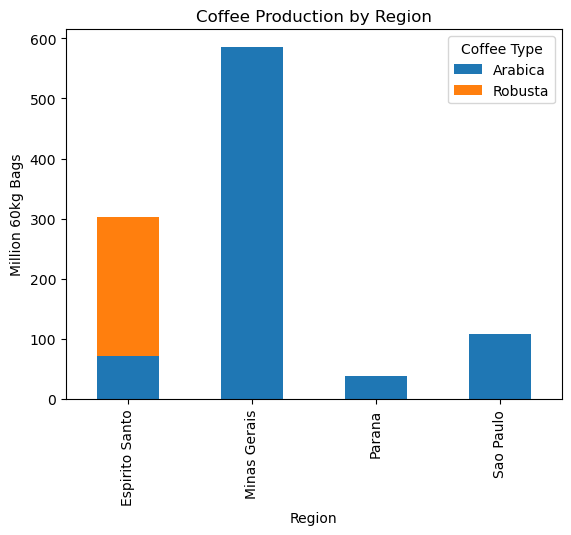

In [170]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/br_final.csv")

#groups by region and coffee sub-category, summing up production
subtrend = br.groupby(["subdivision", "type"])[["million_60kgs_bag"]].sum().reset_index()

# pivots data for a stacked bar chart
bch = subtrend.pivot(index="subdivision", columns="type", values="million_60kgs_bag")

#plots stacked bar chart
bch.plot(kind="bar", stacked=True)

# Add labels, title, and legend
plt.title("Coffee Production by Region")
plt.xlabel("Region")
plt.ylabel("Million 60kg Bags")
plt.legend(title="Coffee Type")




Which region produces the most coffee (by sub-category) in Brazil? 

Minas Gerais produces the most arabica coffee by far at around 590. all the regions produce arabica coffee but only espirito santo produces robusta coffee. most of the coffee produced in espirito santo is robusta at around 300, some being arabica.

Text(0, 0.5, 'Unemployment Rate (%)')

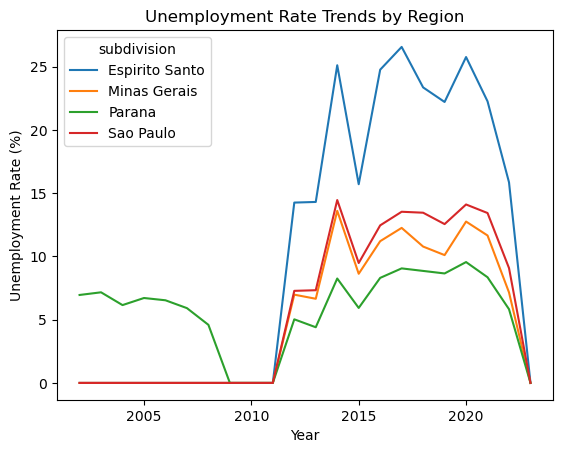

In [171]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/br_final.csv")

#group by subdivision and year and sums the unemployment rate
subtrend = br.groupby(["subdivision", "year"])[["avg_unemp_perc"]].sum().reset_index()
#plots the unemployment rate for the regions over time
sns.lineplot(data=subtrend, x="year", y="avg_unemp_perc", hue="subdivision")

plt.title("Unemployment Rate Trends by Region")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")






How has unemployment changed in the various coffee-producing regions of Brazil?  

all the regions follow the same pattern for unemployment, but again Minas Gerais, is at a larger scale. fluctuations of unemployment fall on the years: 2012(up), 2014(up), 2015(down and back up), 2017(peak about), 2019(down), 2020(up), at end  2023 falls way back down (about 2% for all the regions). in previous graphs 2014 was a year with higher harvests, so unemployment going up is an intersting factor

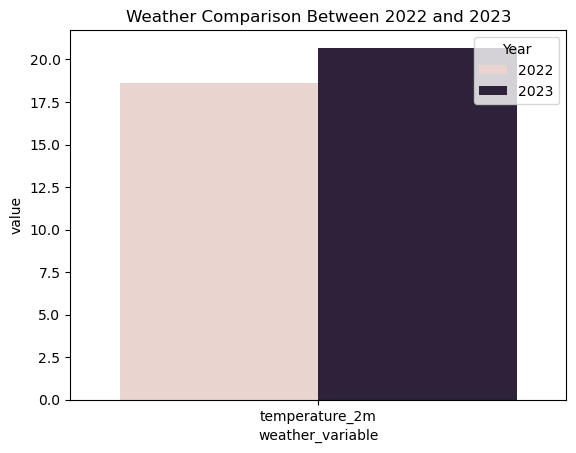

In [172]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/merge.csv")

#groups by year, summing up temperature_2m
weather = br.groupby(["year"])[["temperature_2m"]].sum()
#filters for 2022 and 2023
wcompar = weather.loc[weather.index.isin([2022, 2023])]
#resets index for plotting
wcompar.reset_index(inplace=True)
#plots a side-by-side bar plot
wcompar = wcompar.melt(id_vars="year", value_vars=["temperature_2m"], var_name="weather_variable", value_name="value")
sns.barplot(data=wcompar, x="weather_variable", y="value", hue="year")

plt.title("Weather Comparison Between 2022 and 2023")
plt.legend(title="Year")


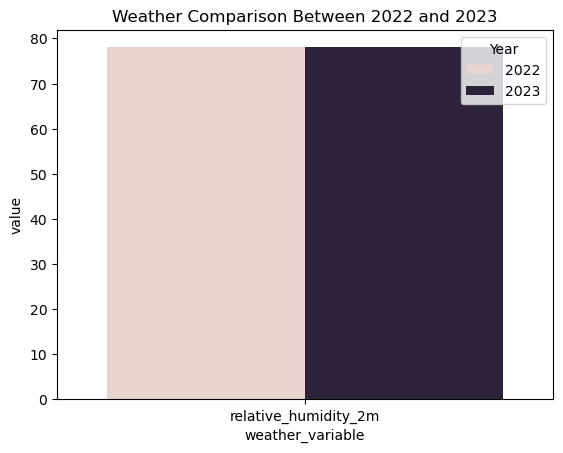

In [173]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/merge.csv")
#groups by year, summing up relative_humidity_2m
weather = br.groupby(["year"])[["relative_humidity_2m"]].sum()
wcompar = weather.loc[weather.index.isin([2022, 2023])]
wcompar.reset_index(inplace=True)
wcompar = wcompar.melt(id_vars="year", value_vars=["relative_humidity_2m"], var_name="weather_variable", value_name="value")
sns.barplot(data=wcompar, x="weather_variable", y="value", hue="year")
plt.title("Weather Comparison Between 2022 and 2023")
plt.legend(title="Year")


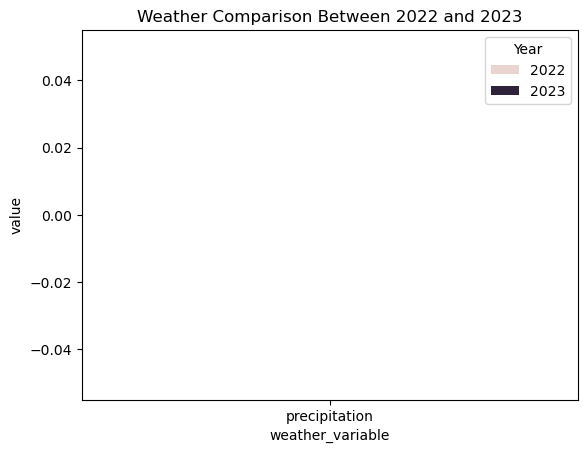

In [174]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/merge.csv")
#groups by year, summing up precipitation
weather = br.groupby(["year"])[["precipitation"]].sum()
wcompar = weather.loc[weather.index.isin([2022, 2023])]
wcompar.reset_index(inplace=True)
wcompar = wcompar.melt(id_vars="year", value_vars=["precipitation"], var_name="weather_variable", value_name="value")
sns.barplot(data=wcompar, x="weather_variable", y="value", hue="year")
plt.title("Weather Comparison Between 2022 and 2023")
plt.legend(title="Year")


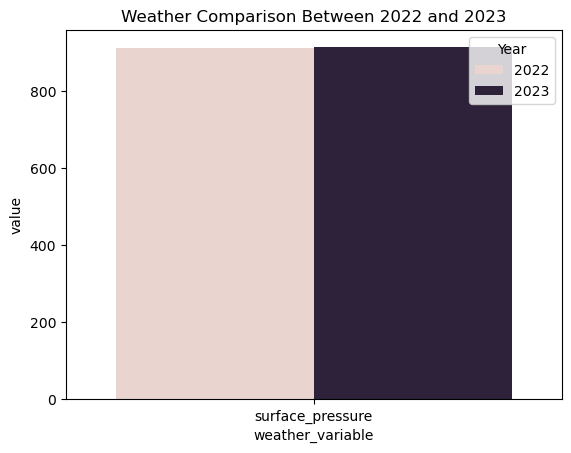

In [175]:
br = pd.read_csv("/Users/sa2/Desktop/TKH/weather/data/csv/merge.csv")
#groups by year, summing up surface_pressure
weather = br.groupby(["year"])[["surface_pressure"]].sum()
wcompar = weather.loc[weather.index.isin([2022, 2023])]
wcompar.reset_index(inplace=True)
wcompar = wcompar.melt(id_vars="year", value_vars=["surface_pressure"], var_name="weather_variable", value_name="value")
sns.barplot(data=wcompar, x="weather_variable", y="value", hue="year")
plt.title("Weather Comparison Between 2022 and 2023")
plt.legend(title="Year")


How have weather outcomes changed for Minas Gerais throughout the years?

comparing 2022 and 2023 weather has stayed the same for the most part

relative_humidity_2m: both years have a value of 78
precipitation: both years have a value of 0
surface_pressure: 2022- 911, 2023- 913, showing a small change but the graph shows an equal value

the only notable diffrence is temperature_2m, 2022-18.6 and 2023-20.7, the differnce showing up on the graph